# Heart Disease Prediction

## Import Basic Libraries for Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from functools import reduce 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Import Data and Building a Data Pipeline

The data was downloaded from Kaggle via the following link: 
https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.isnull().values.any()

False

Change all categorical variables to binary/indicator variables 

In [6]:
df2 = df
df2.columns = df.columns

label_encoding = LabelEncoder()
df2['Sex'] = label_encoding.fit_transform(df2['Sex'].astype(str))
df2['ExerciseAngina'] = label_encoding.fit_transform(df2['ExerciseAngina'].astype(str))
df2 = pd.get_dummies(df2, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

df2.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


Check for Correlation and Multicollinearity

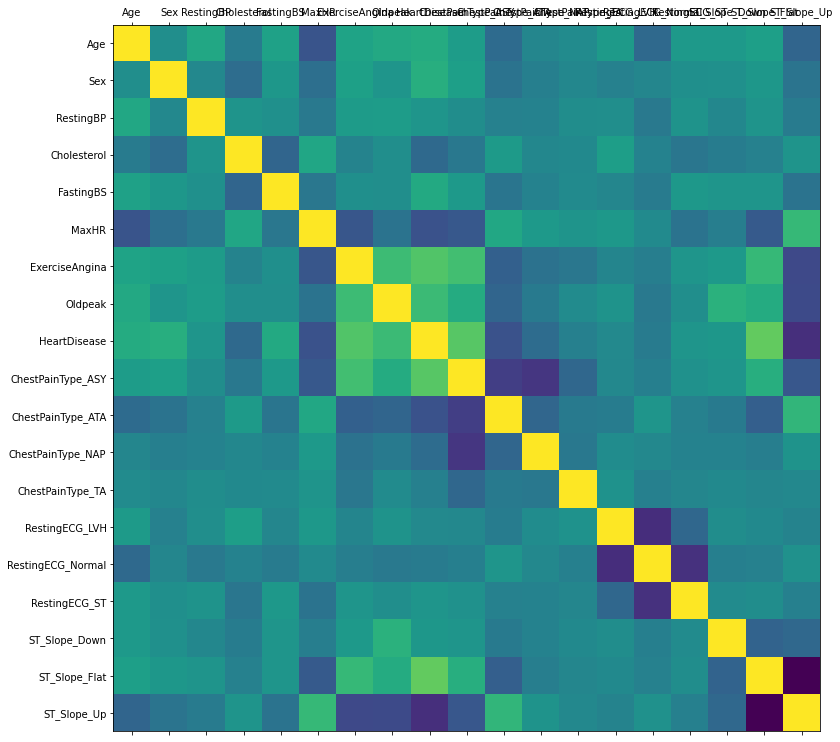

In [7]:
def plot_corr(df, size=13):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(df2)

<AxesSubplot:>

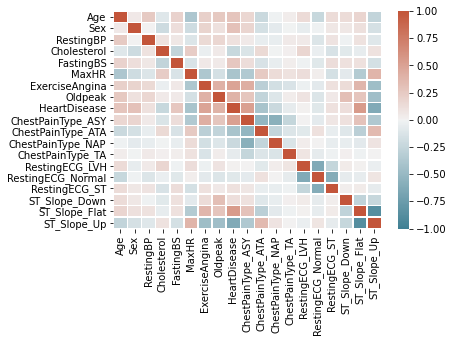

In [8]:
sns.heatmap(df2.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), vmin=-1, vmax=1, linewidths=.5)

In [9]:
df2.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.282039,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,0.138397,0.185568,-0.258067
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.190664,0.105734,0.305445,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,0.066036,0.116077,-0.150942
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.107589,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.232741,-0.120531,0.150954,-0.006634,0.017365,0.177077,-0.038470,-0.133106,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.267291,0.131176,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.127110,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.400421,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,-0.073316,-0.342581,0.383397
ExerciseAngina,0.215793,0.190664,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.494282,0.430034,-0.300365,-0.166030,-0.128105,-0.016382,-0.072924,0.107036,0.136439,0.382237,-0.455676
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.403951,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,1.000000,0.516716,-0.401924,-0.212964,-0.054790,0.010670,-0.091580,0.102527,0.122527,0.554134,-0.622164
ChestPainType_ASY,0.166607,0.183876,0.048824,-0.120531,0.131176,-0.354963,0.430034,0.280026,0.516716,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,0.103407,0.303645,-0.359443


Variables i_ST_Slope_Up or i_ST_Slope_Flat are highly negatively correlated. Remove one of the variables. 

In [10]:
del df2['ST_Slope_Flat']

Check number of true heart disease cases

In [11]:
num_obs = len(df2)
num_true = len(df2.loc[df2['HeartDisease'] == 1])
num_false = len(df2.loc[df2['HeartDisease'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  508 (55.34%)
Number of False cases: 410 (44.66%)


## Modelling

Import libraries for modelling and testing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error, precision_score, accuracy_score
from sklearn import metrics

In [13]:
target = df2['HeartDisease']
df2 = df2.drop(columns = 'HeartDisease')

Scale the data

In [14]:
sc = StandardScaler()
# sc = MinMaxScaler()
sc.fit(df2)
df_transformed = pd.DataFrame(sc.fit_transform(df2))
df_transformed.columns = df2.columns
df_transformed['HeartDisease'] = target
df_transformed.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Up,HeartDisease
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000
mean,-7.304735e-17,-9.447780e-16,1.084221e-16,-6.482953e-16,-1.009843e-15,4.370747e-16,-7.031412e-16,-2.024524e-16,5.379381e-16,-9.066217e-16,-1.213747e-15,1.690127e-16,3.755045e-15,-2.828771e-16,-7.368833e-16,7.509123e-16,4.690027e-16,0.553377
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,0.497414
min,-2.706015e+00,-1.938163e+00,-7.154995e+00,-1.818435e+00,-5.513413e-01,-3.018469e+00,-8.235563e-01,-3.271482e+00,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-4.904493e-01,-2.714484e-01,-8.690559e-01,0.000000
25%,-6.906294e-01,5.159524e-01,-6.699346e-01,-2.337038e-01,-5.513413e-01,-6.605778e-01,-8.235563e-01,-8.324324e-01,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-4.904493e-01,-2.714484e-01,-8.690559e-01,0.000000
50%,5.188098e-02,5.159524e-01,-1.295128e-01,2.213632e-01,-5.513413e-01,4.678968e-02,-8.235563e-01,-2.695748e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-4.904493e-01,-2.714484e-01,-8.690559e-01,1.000000
75%,6.883185e-01,5.159524e-01,4.109089e-01,6.238346e-01,-5.513413e-01,7.541571e-01,1.214246e+00,5.747115e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-4.904493e-01,-2.714484e-01,1.150674e+00,1.000000
max,2.491558e+00,5.159524e-01,3.653439e+00,3.697252e+00,1.813758e+00,2.561874e+00,1.214246e+00,4.983762e+00,9.223917e-01,2.075177e+00,1.876744e+00,4.353909e+00,1.970528e+00,8.142748e-01,2.038947e+00,3.683942e+00,1.150674e+00,1.000000


Split the data into training and testing datasets

In [15]:
feature_col_names = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
                     'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_NAP',
                     'ChestPainType_ATA', 'ChestPainType_TA', 'RestingECG_Normal',
                     'RestingECG_LVH', 'RestingECG_ST', 'ST_Slope_Up', 'ST_Slope_Down']
predicted_class_names = ['HeartDisease']

X = df_transformed[feature_col_names].values
y = df_transformed[predicted_class_names].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234) 

print("{0:0.2f}% in training set".format((len(X_train)/len(df_transformed.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_transformed.index)) * 100))

print("Original True  : {0} ({1:0.2f}%)".format(len(df_transformed.loc[df_transformed['HeartDisease'] == 1]), 
                                                (len(df_transformed.loc[df_transformed['HeartDisease'] == 1])/len(df_transformed.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df_transformed.loc[df_transformed['HeartDisease'] == 0]), 
                                                (len(df_transformed.loc[df_transformed['HeartDisease'] == 0])/len(df_transformed.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 
                                                (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 
                                                (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 
                                                (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 
                                                (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

69.93% in training set
30.07% in test set
Original True  : 508 (55.34%)
Original False : 410 (44.66%)

Training True  : 353 (54.98%)
Training False : 289 (45.02%)

Test True      : 155 (56.16%)
Test False     : 121 (43.84%)


### Naive Bayes 

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

Performance on Training Data

In [17]:
nb_predict_train = nb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, nb_predict_train)))
print("")
print("Confusion Matrix")
print("{0}".format(confusion_matrix(y_train, nb_predict_train)))
print("")
print("Classification Report")
print(classification_report(y_train, nb_predict_train))

Accuracy: 0.8427

Confusion Matrix
[[237  52]
 [ 49 304]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       289
           1       0.85      0.86      0.86       353

    accuracy                           0.84       642
   macro avg       0.84      0.84      0.84       642
weighted avg       0.84      0.84      0.84       642



Performance on Testing Data

In [18]:
nb_predict_test = nb_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, nb_predict_test)))
print("")
print("Confusion Matrix")
print("{0}".format(confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(classification_report(y_test, nb_predict_test))

Accuracy: 0.8587

Confusion Matrix
[[102  19]
 [ 20 135]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       121
           1       0.88      0.87      0.87       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=20, max_features=5)
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(max_features=5, n_estimators=20, random_state=42)

Performance on Training Data

In [20]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, rf_predict_train)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, rf_predict_train))
print("")
print("Classification Report")
print(classification_report(y_train, rf_predict_train))

Accuracy: 0.9969

Confusion Matrix
[[288   1]
 [  1 352]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       353

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



Performance on Testing Data

In [21]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, rf_predict_test)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(classification_report(y_test, rf_predict_test))

Accuracy: 0.8986

Confusion Matrix
[[106  15]
 [ 13 142]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       121
           1       0.90      0.92      0.91       155

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, random_state=42, solver='liblinear')

Performance on Training Data

In [23]:
lr_predict_train = lr_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, lr_predict_train)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, lr_predict_train))
print("")
print("Classification Report")
print(classification_report(y_train, lr_predict_train))

Accuracy: 0.8598

Confusion Matrix
[[238  51]
 [ 39 314]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       289
           1       0.86      0.89      0.87       353

    accuracy                           0.86       642
   macro avg       0.86      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642



Performance on Testing Data

In [24]:
lr_predict_test = lr_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, lr_predict_test)))
print(confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(classification_report(y_test, lr_predict_test))

Accuracy: 0.8877
[[102  19]
 [ 12 143]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       121
           1       0.88      0.92      0.90       155

    accuracy                           0.89       276
   macro avg       0.89      0.88      0.89       276
weighted avg       0.89      0.89      0.89       276



Setting Regularization Parameter

1st max value of 0.929 occured at C=0.100


Text(0, 0.5, 'recall score')

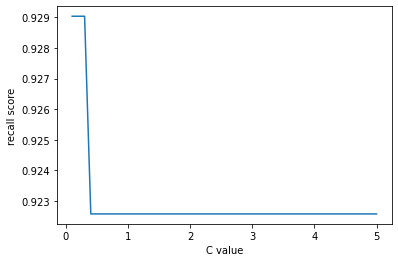

In [25]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, solver='liblinear', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Logisitic regression with class_weight = 'balanced'

1st max value of 0.916 occured at C=0.300


Text(0, 0.5, 'recall score')

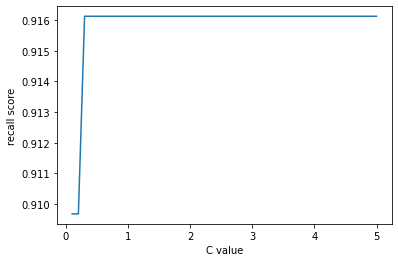

In [26]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", solver='liblinear', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [27]:
lr_model = LogisticRegression( class_weight="balanced", C=best_score_C_val, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.30000000000000004, class_weight='balanced',
                   random_state=42, solver='liblinear')

Performance on Training Data

In [28]:
lr_predict_train2 = lr_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, lr_predict_train2)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, lr_predict_train2))
print("")
print("Classification Report")
print(classification_report(y_train, lr_predict_train2))
print(metrics.recall_score(y_train, lr_predict_train2))

Accuracy: 0.8520

Confusion Matrix
[[242  47]
 [ 48 305]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       289
           1       0.87      0.86      0.87       353

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642

0.8640226628895185


Performance on Testing Data

In [29]:
lr_predict_test2 = lr_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, lr_predict_test2)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, lr_predict_test2))
print("")
print("Classification Report")
print(classification_report(y_test, lr_predict_test2))
print(metrics.recall_score(y_test, lr_predict_test2))

Accuracy: 0.9022

Confusion Matrix
[[107  14]
 [ 13 142]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       121
           1       0.91      0.92      0.91       155

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

0.9161290322580645


### Logistic Regression CV

In [30]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, solver='liblinear', random_state=42, Cs=3, 
                                   cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False, solver='liblinear')

Performance on Training Data

In [31]:
lr_cv_predict_train = lr_cv_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, lr_cv_predict_train)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, lr_cv_predict_train))
print("")
print("Classification Report")
print(classification_report(y_train, lr_cv_predict_train))

Accuracy: 0.8520

Confusion Matrix
[[242  47]
 [ 48 305]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       289
           1       0.87      0.86      0.87       353

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



Performance on Testing Data

In [32]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, lr_cv_predict_test)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, lr_cv_predict_test))
print("")
print("Classification Report")
print(classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.8949

Confusion Matrix
[[107  14]
 [ 15 140]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       121
           1       0.91      0.90      0.91       155

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.89       276



### XGBoost

In [33]:
import xgboost as xgb
from xgboost import XGBClassifier

In [34]:
xgb_classmodel = XGBClassifier(objective = 'binary:logistic',
                               max_depth = 5,
                               max_delta_step = 0.1,
                               gamma = 0.6)
xgb_model = xgb_classmodel.fit(X_train, y_train)

[20:33:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Performance on Training Data

In [35]:
predictions_train = xgb_model.predict(X_train)
logit_auc_roc_train = roc_auc_score(y_train, predictions_train)
cm_train = confusion_matrix(y_train, predictions_train)
print('AUC %.6f' % logit_auc_roc_train)
print("")
print('Confusion matrix:\n {}\n'.format(cm_train))
print("Classification Report")
print(classification_report(y_train, predictions_train))

AUC 0.907971

Confusion matrix:
 [[253  36]
 [ 21 332]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       289
           1       0.90      0.94      0.92       353

    accuracy                           0.91       642
   macro avg       0.91      0.91      0.91       642
weighted avg       0.91      0.91      0.91       642



Performance on Testing Data

In [36]:
predictions = xgb_model.predict(X_test)
logit_auc_roc = roc_auc_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
print('AUC %.6f' % logit_auc_roc)
print("")
print('Confusion matrix:\n {}\n'.format(cm))
print("Classification Report")
print(classification_report(y_test, predictions))

AUC 0.897494

Confusion matrix:
 [[104  17]
 [ 10 145]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       121
           1       0.90      0.94      0.91       155

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



### LightGBM

In [37]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# converting the dataset into proper LGB format 
d_train = lgb.Dataset(X_train, label = y_train)

# Specifying the parameter
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'

# train the model 
clf = lgb.train(params, d_train, 200) 

[LightGBM] [Info] Number of positive: 353, number of negative: 289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549844 -> initscore=0.200041
[LightGBM] [Info] Start training from score 0.200041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Performance on Training Data

In [39]:
# prediction on the train set
y_pred_train = clf.predict(X_train)

# rounding the values
y_pred_train = y_pred_train.round(0)

# converting from float to integer
y_pred_train = y_pred_train.astype(int)

# roc_auc_score metric
lgbm_auc_roc_train = roc_auc_score(y_pred_train, y_train)
lgbm_cm_train = confusion_matrix(y_train, y_pred_train)
print('AUC %.6f' % lgbm_auc_roc_train)
print("")
print('Confusion matrix:\n {}\n'.format(lgbm_cm_train))
print("Classification Report")
print(classification_report(y_train, y_pred_train))

AUC 0.904189

Confusion matrix:
 [[252  37]
 [ 25 328]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       289
           1       0.90      0.93      0.91       353

    accuracy                           0.90       642
   macro avg       0.90      0.90      0.90       642
weighted avg       0.90      0.90      0.90       642



Performance on Testing Data

In [40]:
# prediction on the test set
y_pred = clf.predict(X_test)

# rounding the values
y_pred = y_pred.round(0)

# converting from float to integer
y_pred = y_pred.astype(int)

# roc_auc_score metric
lgbm_auc_roc = roc_auc_score(y_pred, y_test)
lgbm_cm = confusion_matrix(y_test, y_pred)
print('AUC %.6f' % lgbm_auc_roc)
print("")
print('Confusion matrix:\n {}\n'.format(lgbm_cm))
print("Classification Report")
print(classification_report(y_test, y_pred))

AUC 0.908030

Confusion matrix:
 [[104  17]
 [  9 146]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       121
           1       0.90      0.94      0.92       155

    accuracy                           0.91       276
   macro avg       0.91      0.90      0.90       276
weighted avg       0.91      0.91      0.91       276

